<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
satfile = "./sat_scores.csv"
sat_data = []
with open(satfile, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        sat_data.append(row)    #loading SAT file as a list of rows
f.close()

In [3]:
#converting the numeric data to float
for sat_data_row_num, sat_data_row in enumerate(sat_data):
    for sat_data_row_elm_num, sat_data_row_elm in enumerate(sat_data_row):
        try:
            sat_data[sat_data_row_num][sat_data_row_elm_num] = int(sat_data_row_elm)
        except:
            pass

#creating the dictionary format
sat_dict = {sat_data[0][row_num]:[sat_data[col_num+1][row_num] for col_num in range(len(sat_data)-1)]
            for row_num in range(0, len(sat_data[0]))}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
#make a Dataframe object with the SAT dictionary
sat_df_using_dictionary = pd.DataFrame(sat_dict)

#make a Dataframe object with .read_csv()
sat_df = pd.read_csv(satfile)

print(sat_df_using_dictionary.dtypes, "\n\n", sat_df_using_dictionary.head(), "\n")
sat_df.info()

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object 

   State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


Using read_csv(), we can make the data frame directly from the csv file and there is no need to make a special structure out of it first, as in dictionary.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


This data shows rate, verbal and math variable for each state

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
#columns of data dictionary
data_dict_columns = ["variable", "type of the variable", "length", "description"]

#variables of the data dictionary are the columns of SAT data frame
data_dict_var = list(sat_df.columns)

data_dict_type = [type(sat_df[sat_df.columns[var]][0]) for var in range(0, sat_df.shape[1])]
data_dict_length = [len(sat_df) for num in range(0, sat_df.shape[1])]

#writing descriptions for each variable
desc_var_1 = "Name of the state in USA"
desc_var_2 = "SAT rates"
desc_var_3 = "SAT score in verbal"
desc_var_4 = "SAT score in math"
data_dict_desc = [desc_var_1, desc_var_2, desc_var_3, desc_var_4]

data_dict_info = [data_dict_var, data_dict_type, data_dict_length, data_dict_desc]

In [7]:
#creating the data dictionary in the dictionary format
data_dict_table = {data_dict_columns[num]:data_dict_info[num] for num in range(0, len(data_dict_columns))}

In [8]:
#creating the data dictionary in the DateFrame format
data_dict = pd.DataFrame(data_dict_table, index = list(range(1, len(data_dict_var)+1)))
data_dict

,variable,type of the variable,length,description
1,State,<class 'str'>,52,Name of the state in USA
2,Rate,<class 'numpy.int64'>,52,SAT rates
3,Verbal,<class 'numpy.int64'>,52,SAT score in verbal
4,Math,<class 'numpy.int64'>,52,SAT score in math


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [9]:
import seaborn as sns

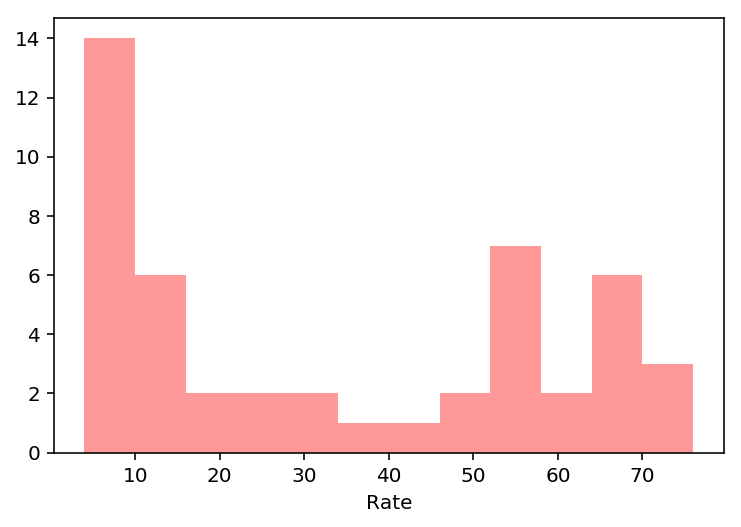

In [10]:
binz = np.arange(min(sat_df["Rate"]), max(sat_df["Rate"]), 6)
sns.distplot(sat_df["Rate"], kde = False, bins = binz, color = 'red')

An alternative is to simply mention the number of bins:

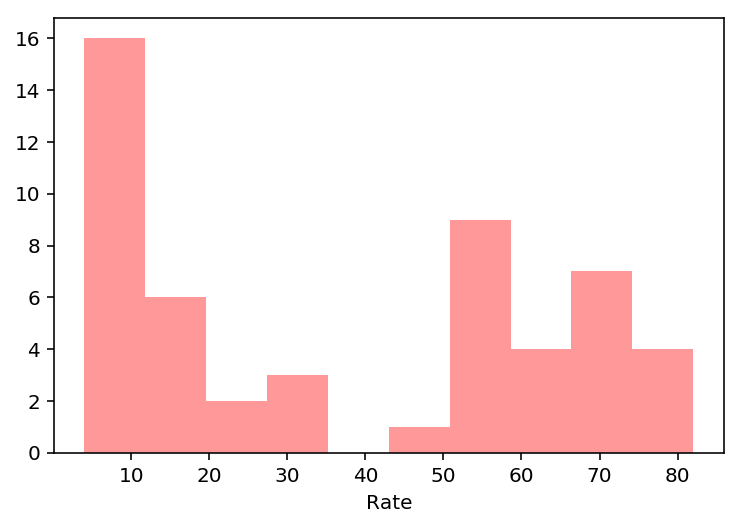

In [11]:
sns.distplot(sat_df["Rate"], kde = False, bins = 10, color = 'red')

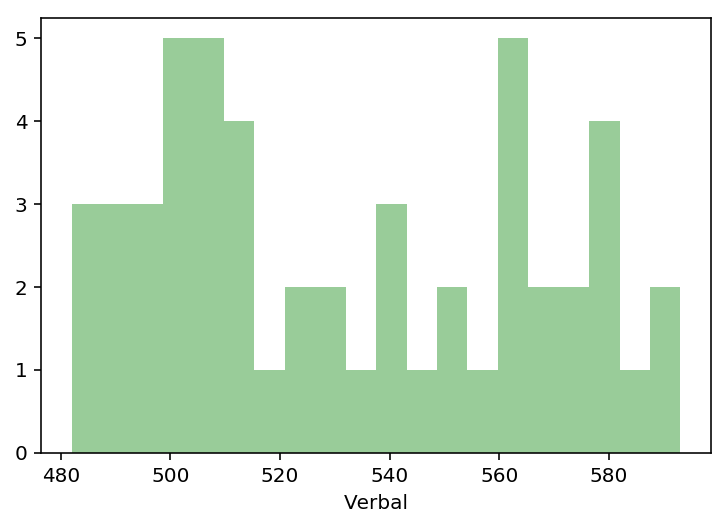

In [12]:
sns.distplot(sat_df["Verbal"], kde = False, bins = 20, color = 'green')

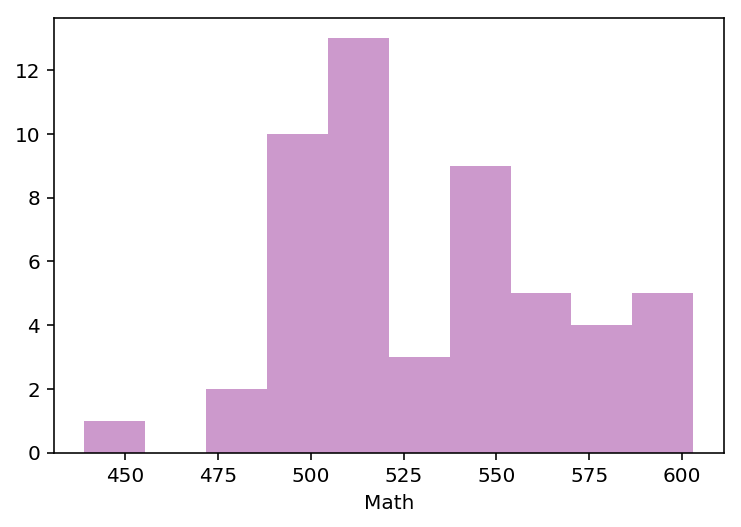

In [13]:
sns.distplot(sat_df["Math"], kde = False, bins = 10, color = 'purple')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

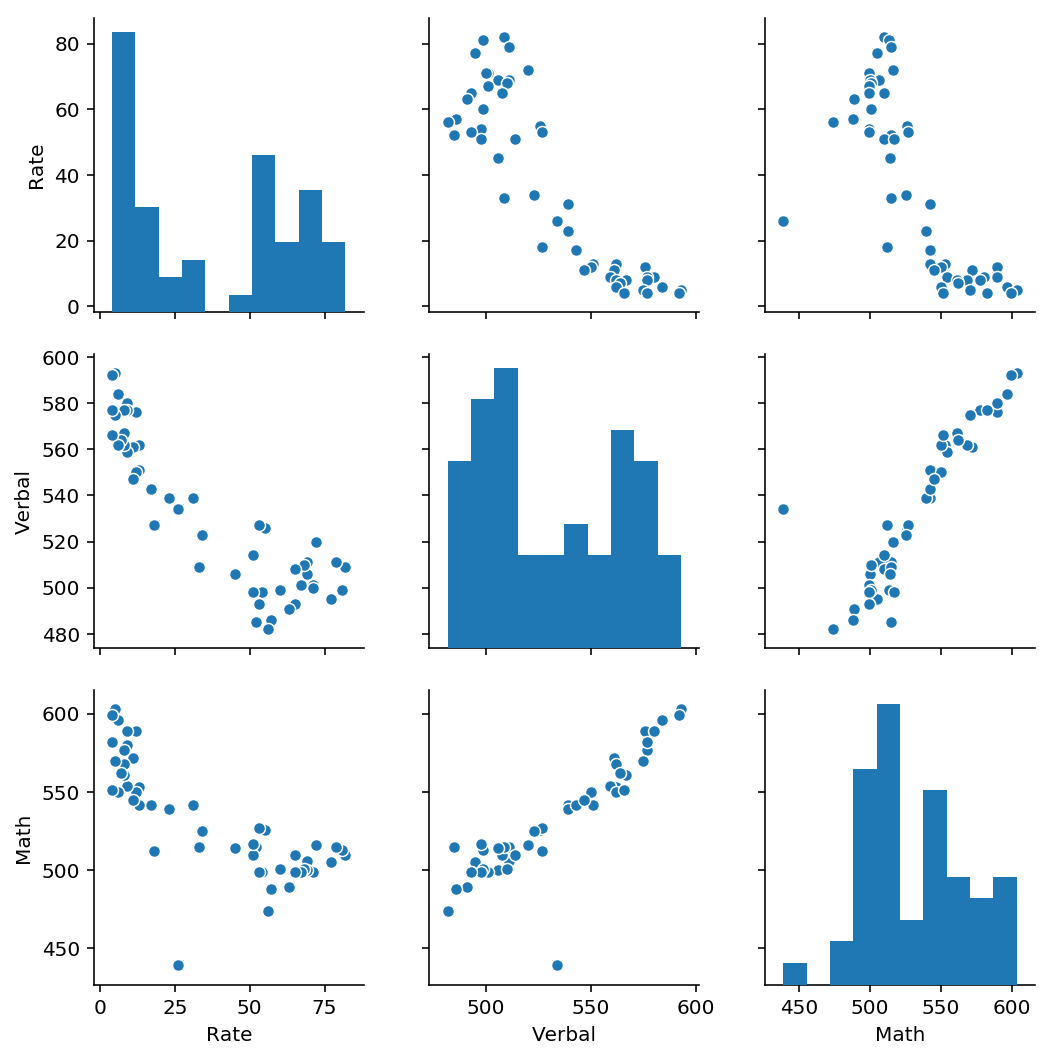

In [14]:
sns.pairplot(sat_df)

The visualizations on the diagonal, show the relation between a variable with itself, therefor they are the same as histograms of that variable. The other visualizations show the relation between two variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

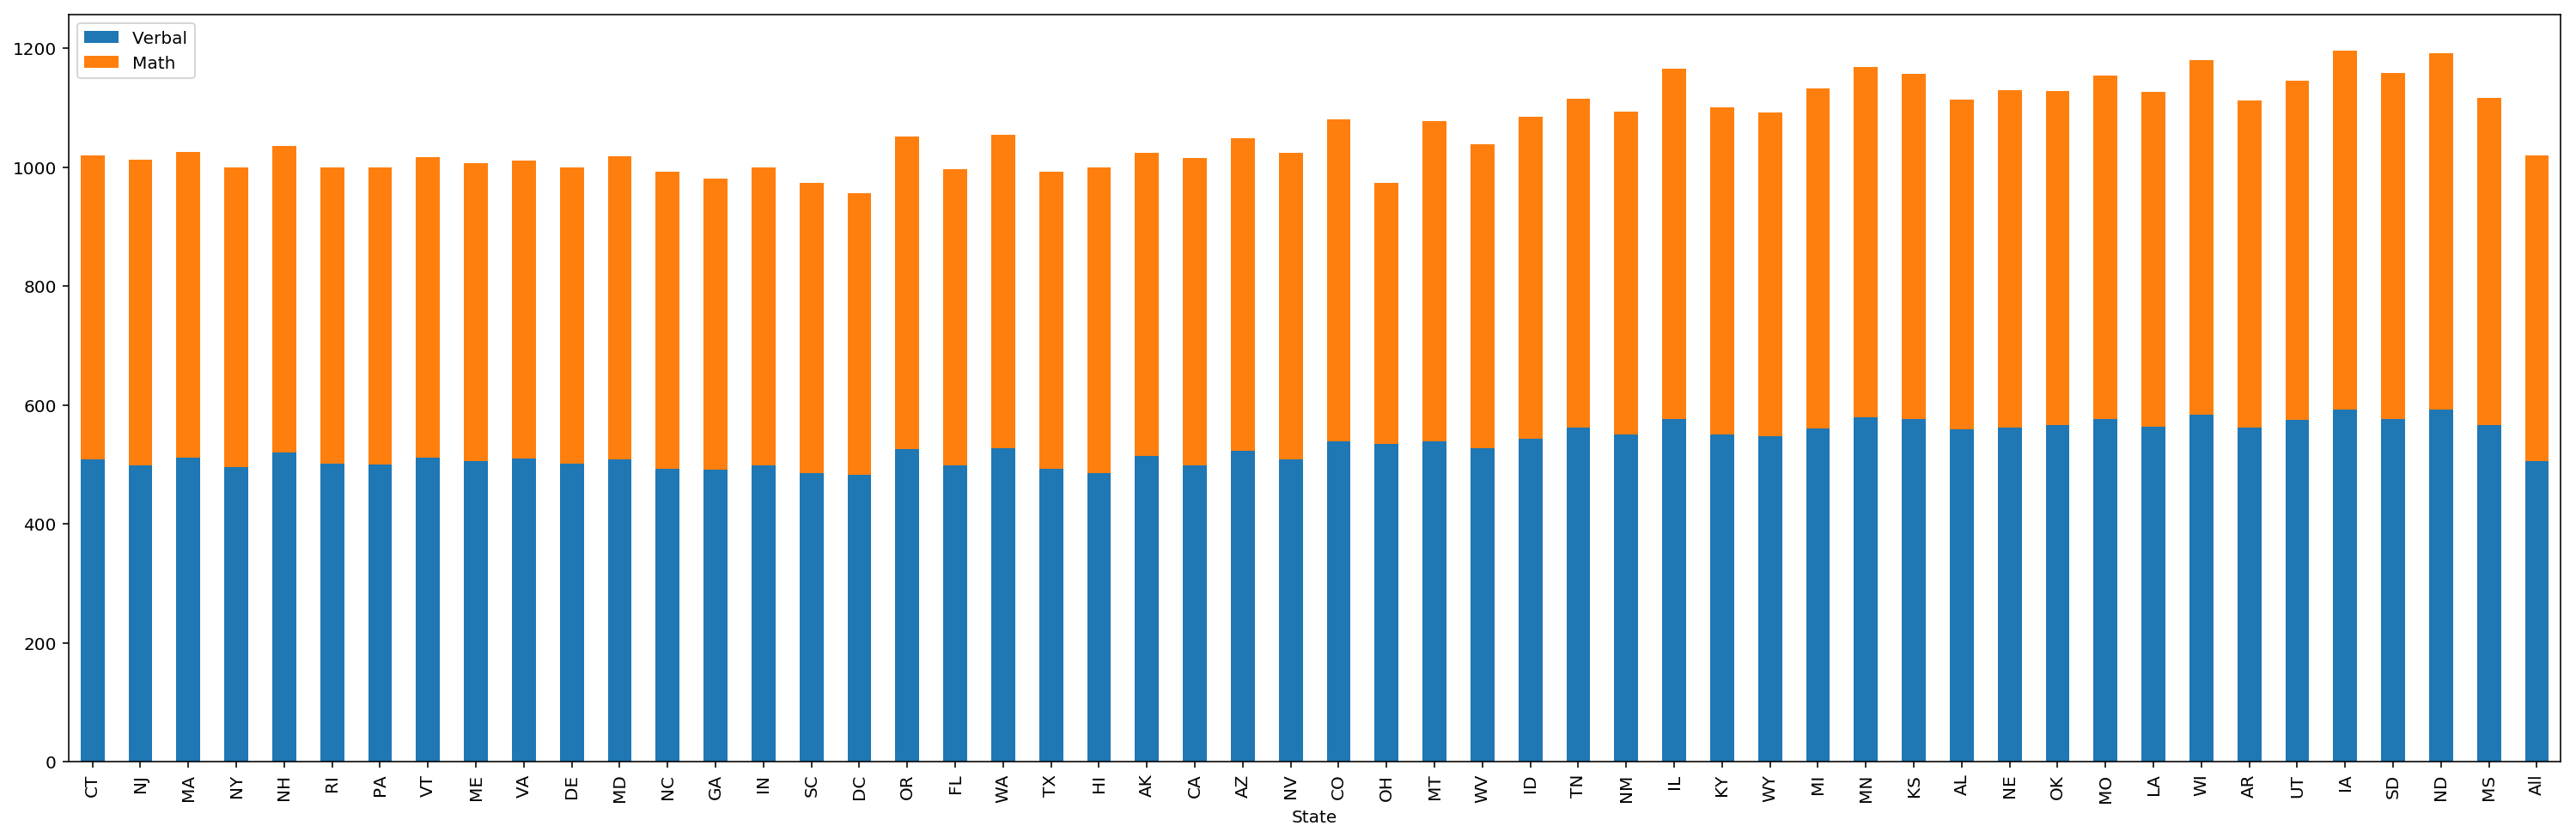

In [15]:
sat_df.set_index("State")[["Verbal", "Math"]].plot.bar(stacked=True, figsize = (26,8))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

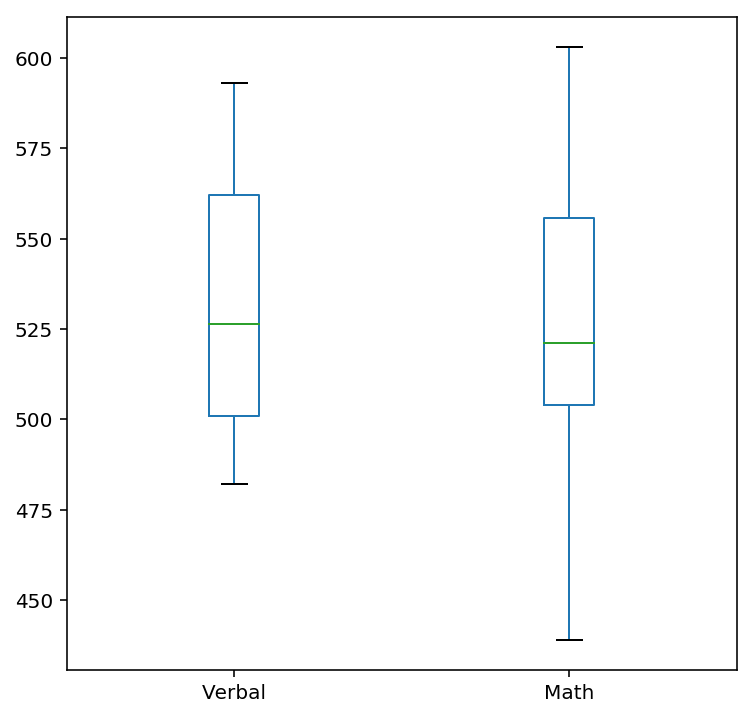

In [16]:
sat_df[["Verbal", "Math"]].plot.box(figsize = (6, 6))

Histograms cannot give us a good understanding of some concepts such as mean and dispersion. Scatterplots just show us the relation of values of the variables ,but again, are unable to show the how each variable is distributed.

Since the scale of the values of Rate is much lower than Verbal and Math, the chart containing all three cannot show the values clearly.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


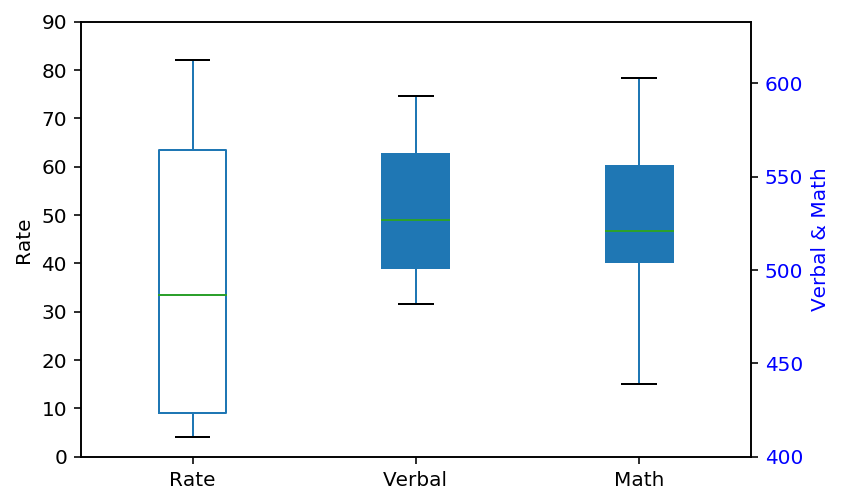

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Rate')
sat_df.plot.box(ax=ax1)
ax1.set_ylim(bottom = 0, top = 90)
ax2 = ax1.twinx()
sat_df.plot.box(ax=ax2, patch_artist = True)
ax2.set_ylim(bottom= 400)
ax2.set_ylabel('Verbal & Math', color='b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
states_verbal_greater_than_average = list(sat_df[sat_df["Verbal"] > sat_df["Verbal"].mean()]["State"])

In [19]:
print("List of states that have Verbal scores greater than average:\n\n", states_verbal_greater_than_average)

List of states that have Verbal scores greater than average:

 ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [20]:
print("Number of states with Verbal scores greater than the average:", len(states_verbal_greater_than_average))

Number of states with Verbal scores greater than the average: 24


Since there is a total number of 52 states, we can see that almost half of the states have a Verbal score greater than the average. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
states_verbal_greater_than_median = list(sat_df[sat_df["Verbal"] > sat_df["Verbal"].median()]["State"])

In [22]:
print("List of states that have Verbal scores greater than median:\n\n", states_verbal_greater_than_median)

List of states that have Verbal scores greater than median:

 ['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [23]:
states_verbal_greater_than_avgmed = []
for state in states_verbal_greater_than_average:
    if state in states_verbal_greater_than_median:
        states_verbal_greater_than_avgmed.append(state)

In [24]:
print(len(states_verbal_greater_than_avgmed))

24


All the states with a verbal score greater than average are also in the list of states with a score greater than median. There are only two states that have a score greater than median but less than average.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
sat_with_difference_df = pd.DataFrame()
sat_with_difference_df["State"] = sat_df["State"]
sat_with_difference_df["Verbal - Math"] = sat_df["Verbal"] - sat_df["Math"]

In [26]:
sat_with_difference_df.head()

,State,Verbal - Math
0,CT,-1
1,NJ,-14
2,MA,-4
3,NY,-10
4,NH,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [27]:
sat_great_diff_greater_verb = sat_with_difference_df.sort_values("Verbal - Math", ascending = False)[:][0:10]
sat_great_diff_greater_math = sat_with_difference_df.sort_values("Verbal - Math", ascending = True)[:][0:10]

In [28]:
sat_great_diff_greater_verb.head(3)

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15


In [29]:
sat_great_diff_greater_math.head(3)

,State,Verbal - Math
21,HI,-30
23,CA,-19
1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [30]:
sat_df[["Rate", "Verbal", "Math"]].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


The correlation between Verbal and Math is closer to 1, thus there is a relatively stronger positive linear relationship between these two variables. However, Rate and Verbal have almost as same strong negative linear relationship as Verbal and Math.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [31]:
sat_df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


Each row shows different statistical characteristics for each variable. These characteristics include the number of each variable, its mean and variance, minimum and maximum and some percentiles.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [32]:
sat_df[["Rate", "Verbal", "Math"]].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


Both matices can show if there is relationship between variables. Covariance can take on any value but correlation can only take on values between negativr 1 and 1, thus it can be a measure of strength for linear relationship between variables. The diagonal of the covariance matrix is the variance of the corresponding variable (since it is the covariance between a variable and itself) whereas the diagonal of the correlation matrix is always 1.

Deviding the covariance by the product of standard deviations of the two variables, we can calculate the correlation.

Since covariance is not normalized, it can cannot show us how strong the relationship between variables is. A high value of covariance might be because of the scales of the variable itself. But correlation is a normalized values. So the closer the absolute value to 1, the stronger the relationship.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [33]:
drug_df = pd.read_csv("drug-use-by-age.csv")

In [34]:
drug_df.head(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


In [35]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

There are a few cells in which there is no numerical data. These cells are filled with '-'. We need to substitute these cells with NaN to be able to apply the calculations in the future.

In [36]:
#replacing all cells of '-' with NaN
def data_cleaner(x):
    if x == '-':
        return np.nan
    else:
        return x

In [37]:
drug_df = drug_df.applymap(data_cleaner)

In [38]:
#converting every cell into float
def data_type_correct(x):
    if type(x) == str:
        return float(x)
    else:
        return x

In [39]:
drug_df.iloc[:, 2:] = drug_df.iloc[:, 2:].applymap(data_type_correct)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [40]:
#data frame containing only drug use
drug_use = drug_df.iloc[:, 2::2]

#data frame containing only drug frequency
drug_frq = drug_df.iloc[:, 3::2]

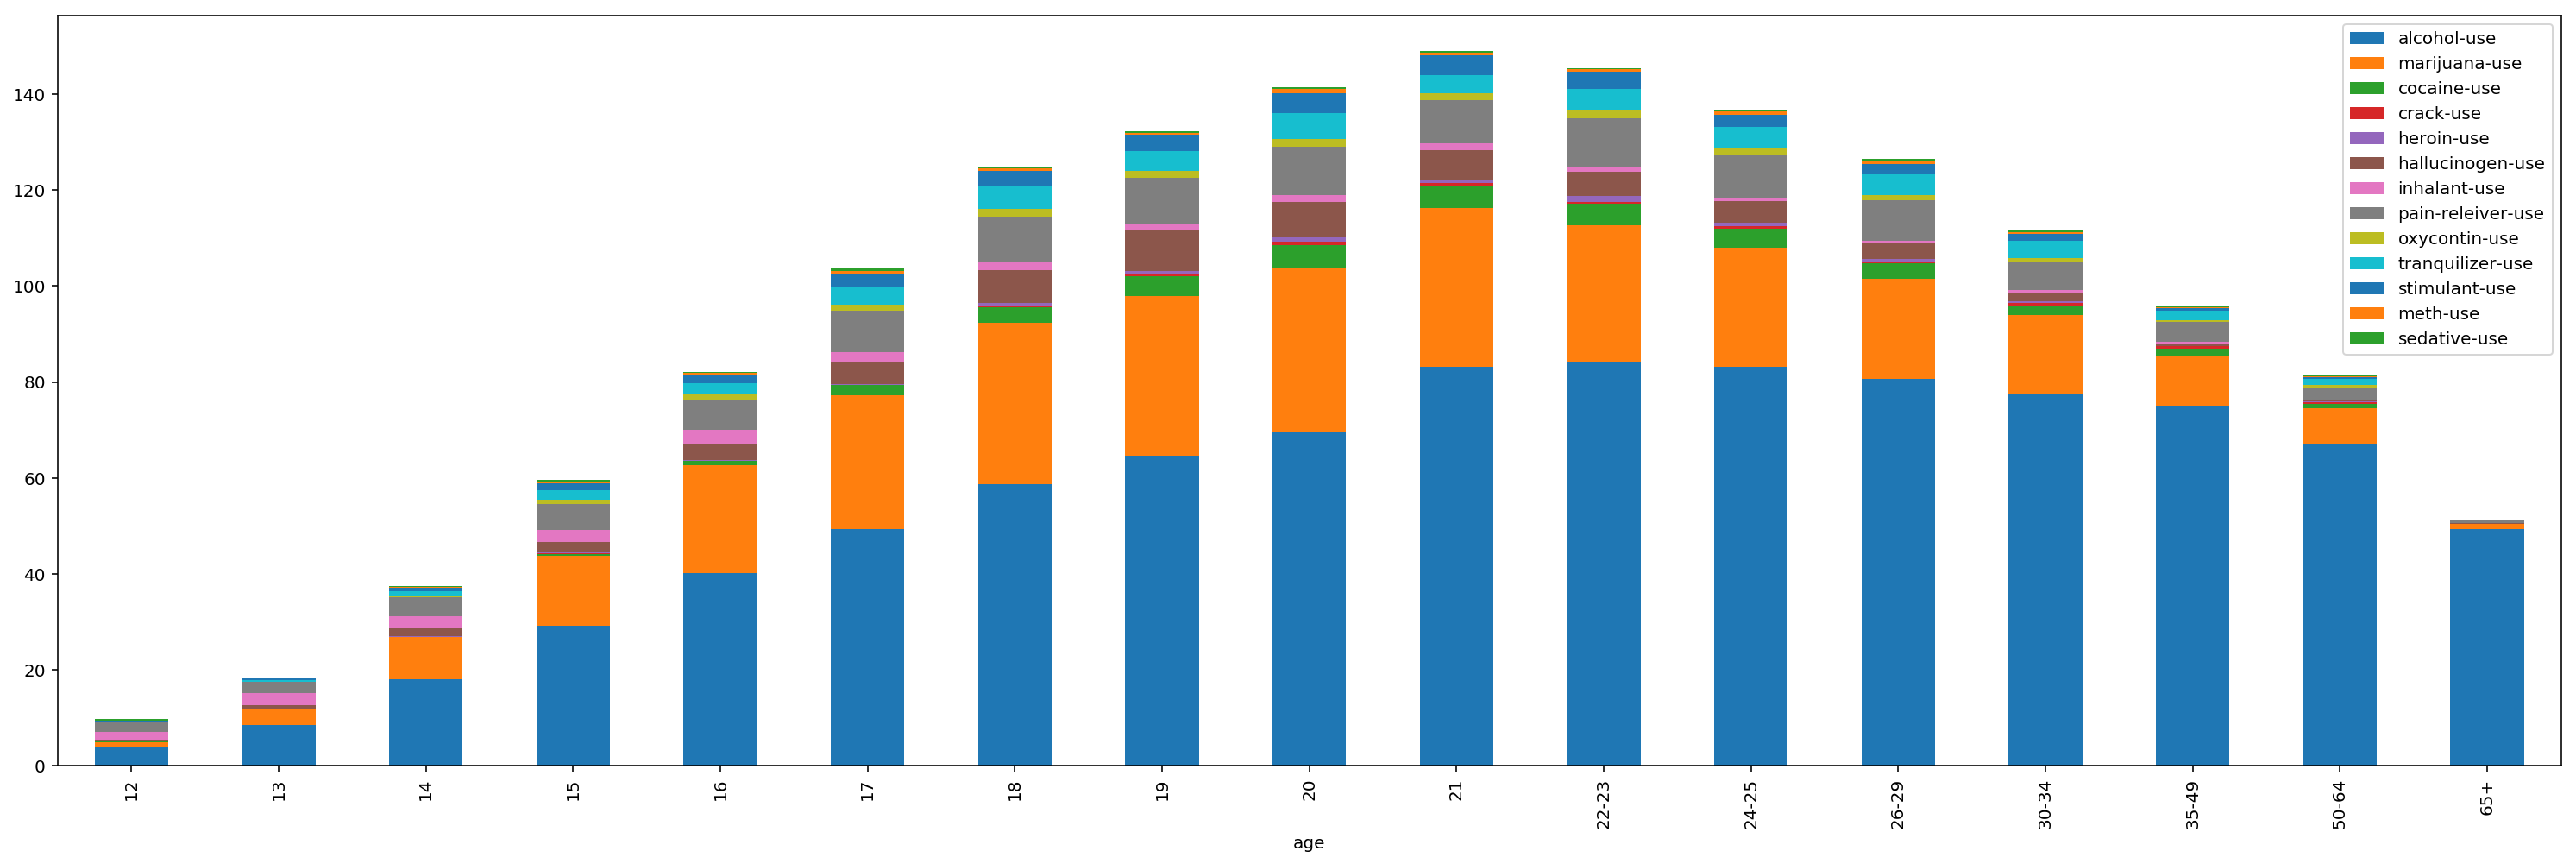

In [41]:
drug_use.set_index(drug_df["age"]).plot.bar(stacked=True, figsize = (26,8))

The total use of different types of drug seems to be higher for people of age 21 to 23. Since alcohol use comprises a big portion of use among all ages, we can plot the chart again without alcohol use to see if it makes any difference.

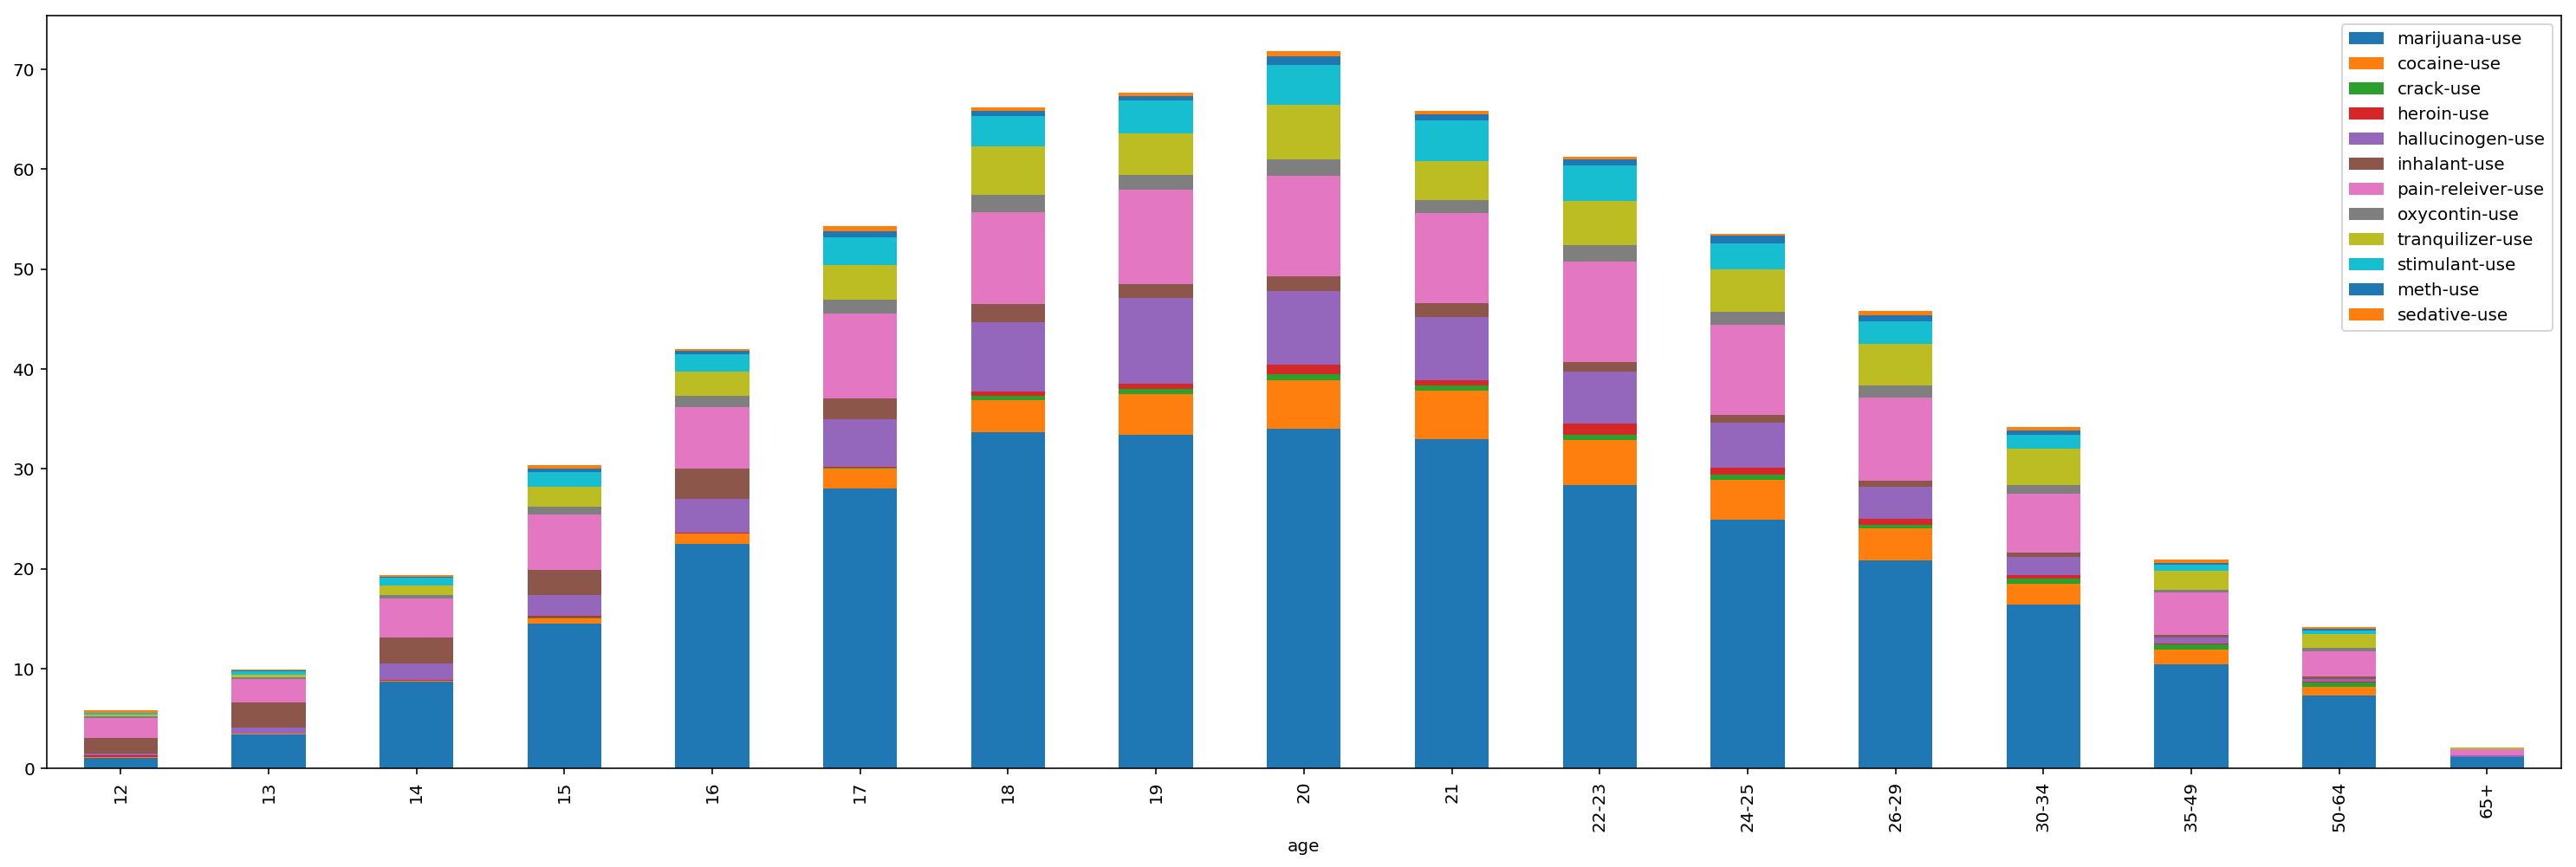

In [42]:
#plotting the drug use in terms of age excluding the use of alocohol
drug_use.iloc[:,1:].set_index(drug_df["age"]).plot.bar(stacked=True, figsize = (26,8))

The second biggest use seems to be marijuana. the total use of different types of drug is higher for people of age 20. Although the values are close for people in the range of 18 to 23 years of age.

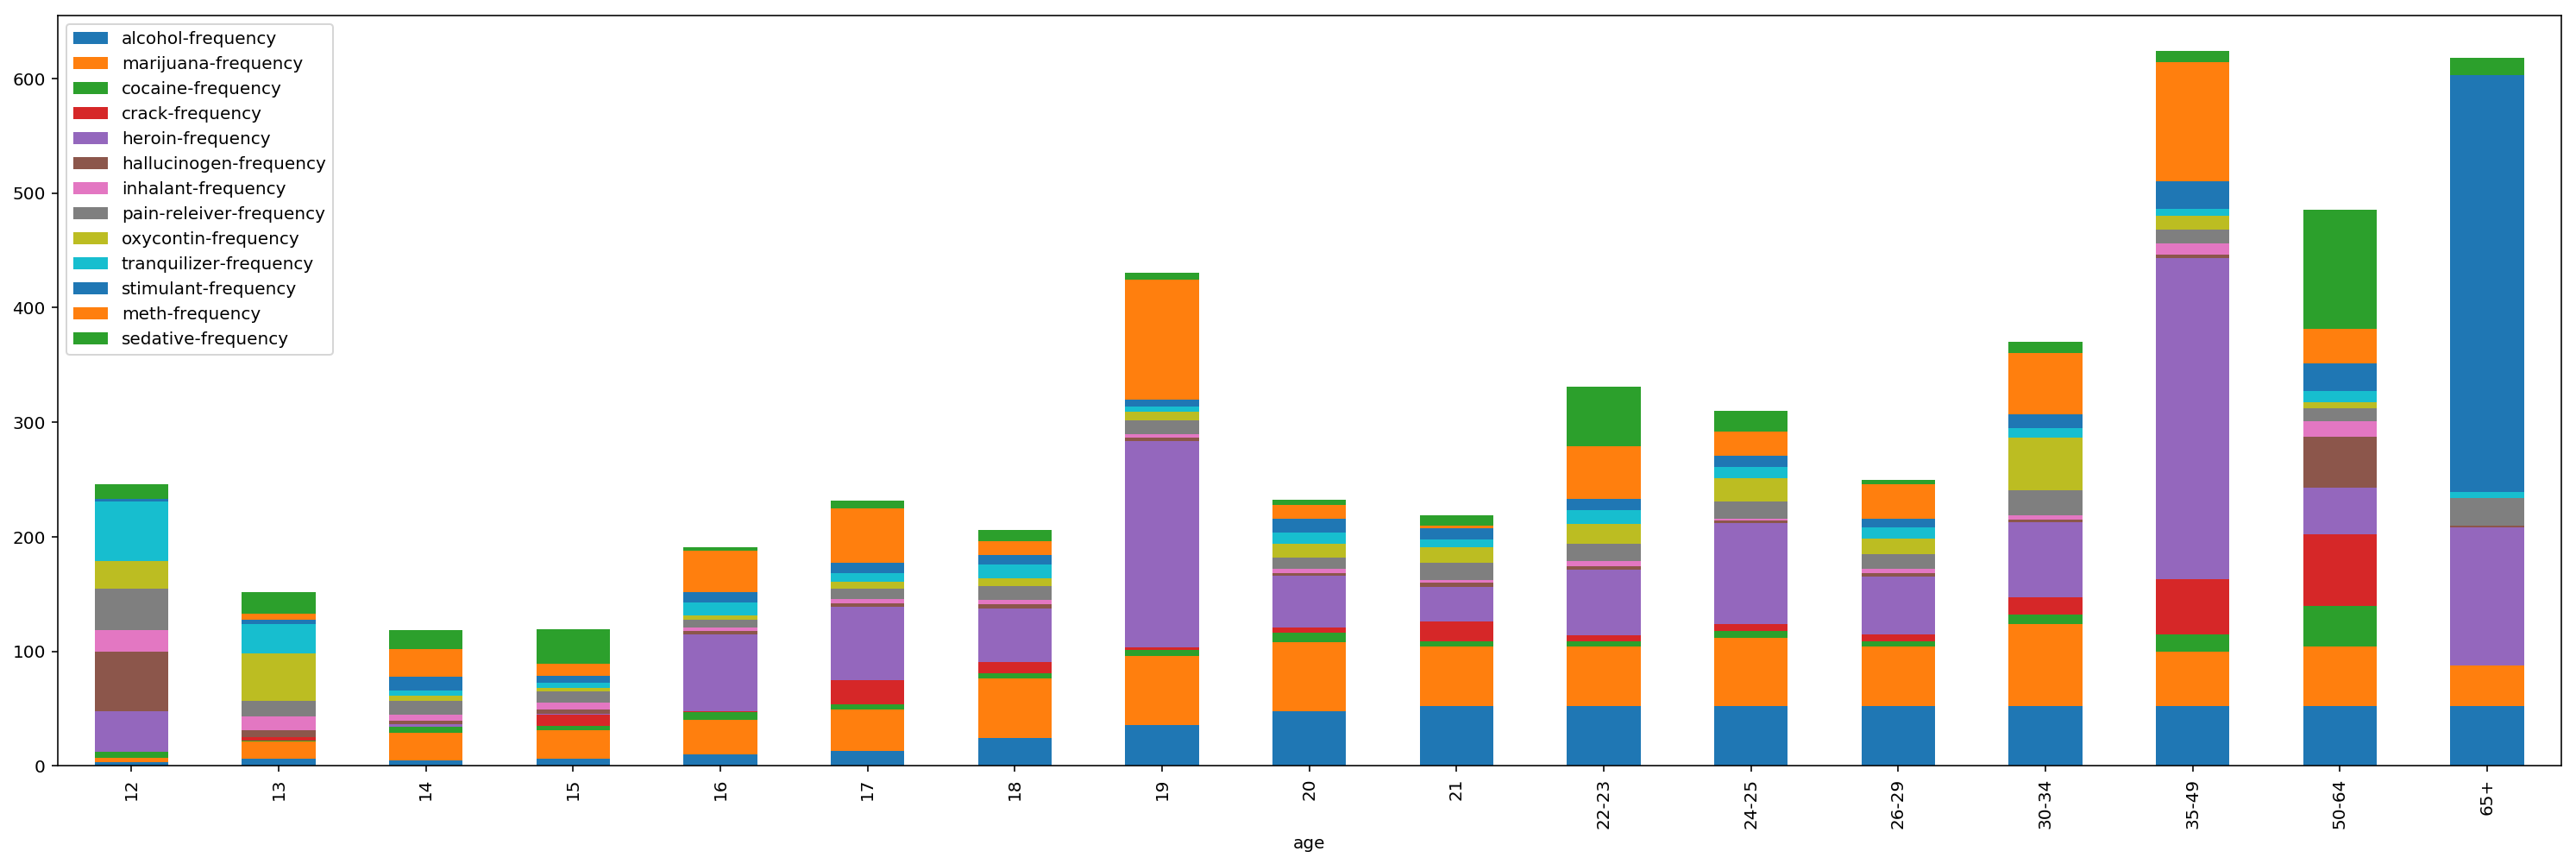

In [43]:
drug_frq.set_index(drug_df["age"]).plot.bar(stacked=True, figsize = (26,8))

<BarContainer object of 17 artists>

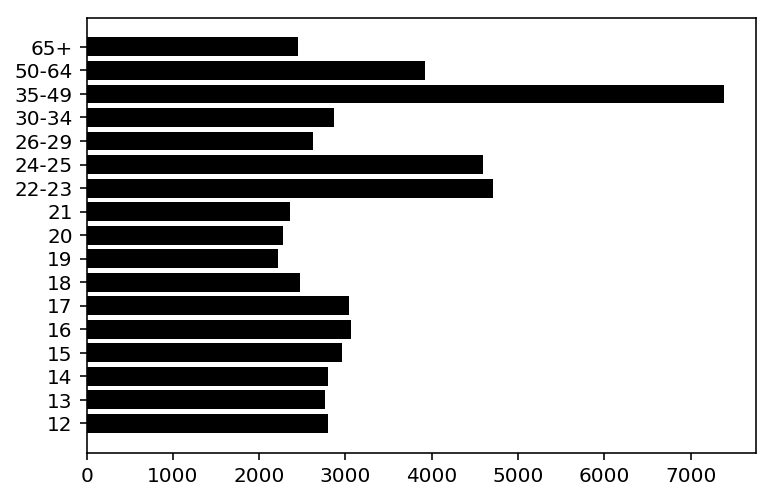

In [44]:
plt.barh(drug_df.age, drug_df.n, color = 'black')

The number of drug users is higher for people in the range of 50-64. After that, people in the range of 22-25 have the highest numbers.

In [45]:
corr_use = drug_use.corr()

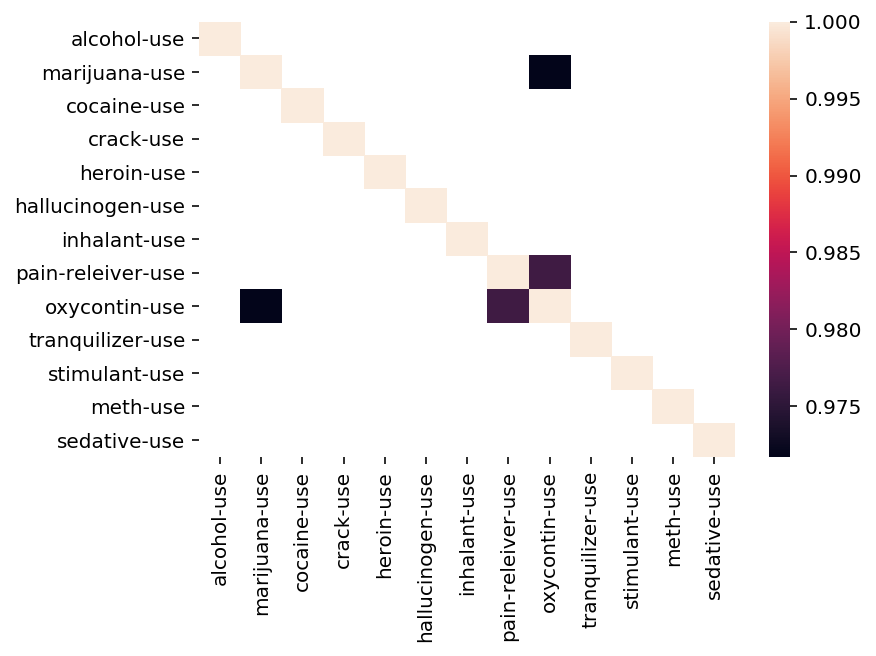

In [46]:
sns.heatmap(corr_use[0.97 < abs(corr_use)])

There is a strong linear relationship between some variables as it is seen in the heatmap above.

In [47]:
corr_frq = drug_frq.corr()

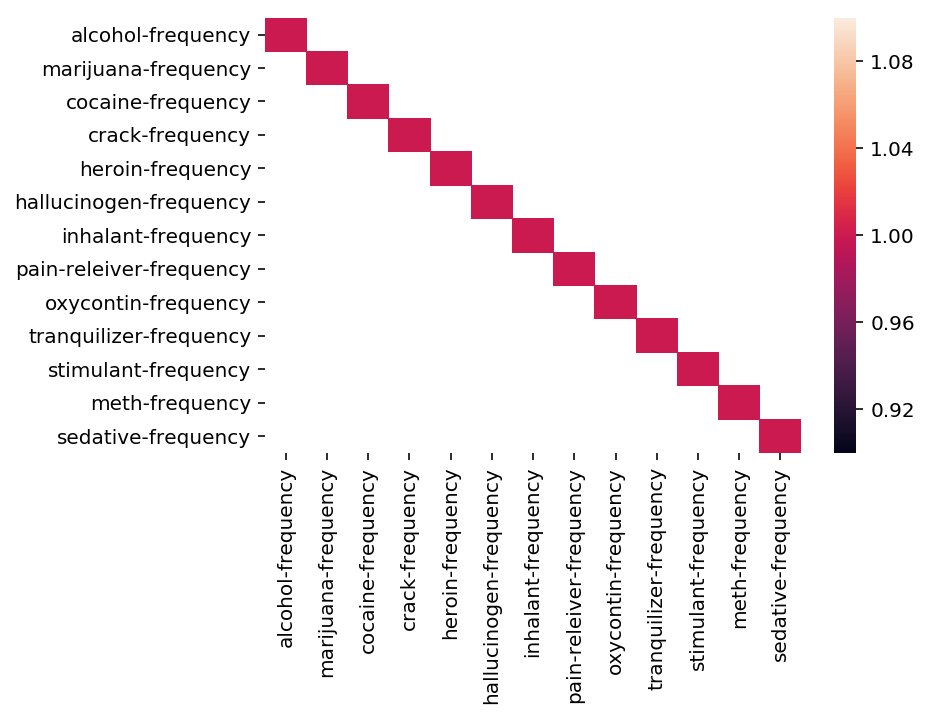

In [48]:
sns.heatmap(corr_frq[0.95 < abs(corr_frq)])

There are no variables with linear relationships as strong as the variables of drug use.

Based on the heatmap, we can explore the relationship of some variables (with stronger linear relationship) in more detail. We can do this by plotting them against each other.

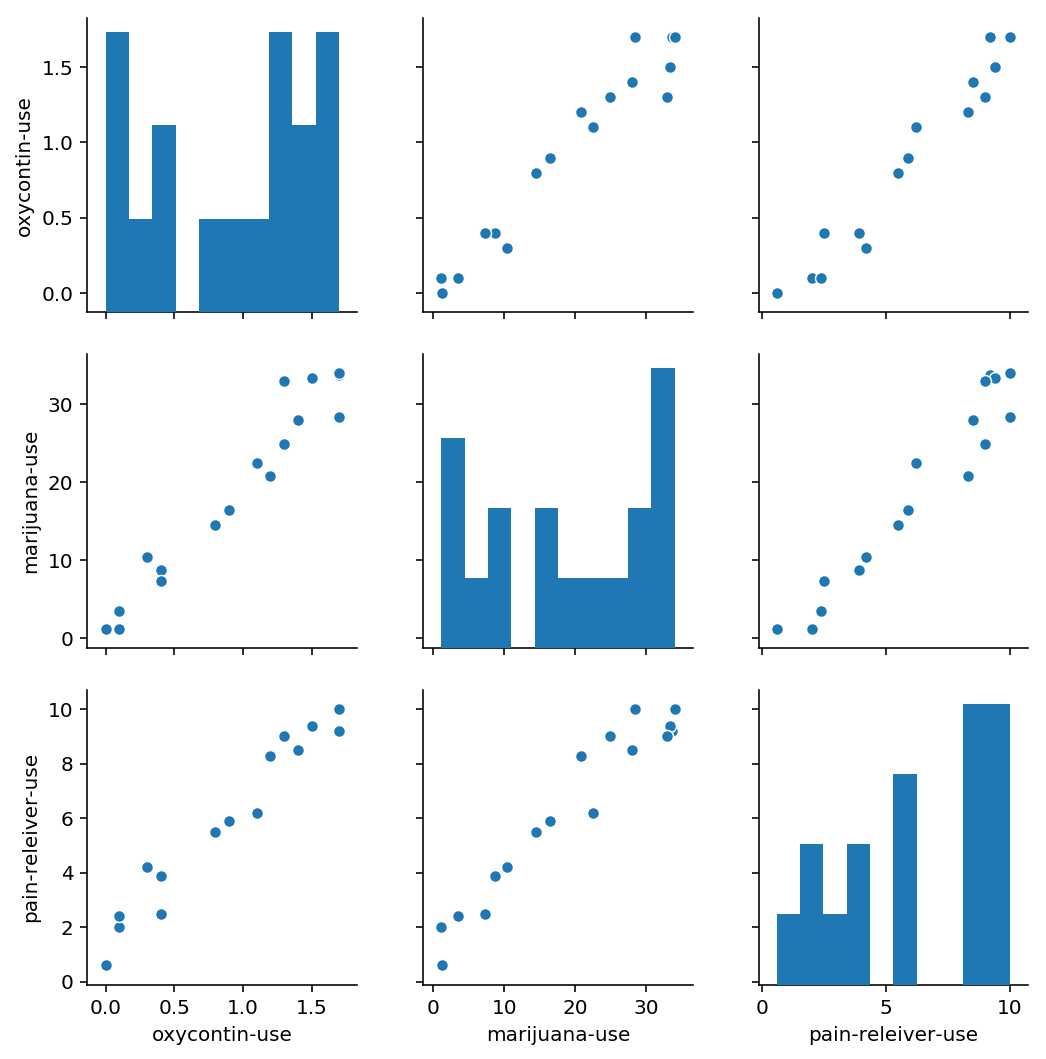

In [49]:
sns.pairplot(drug_use[['oxycontin-use', 'marijuana-use', 'pain-releiver-use']])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Let us explore if the distribution of pain releiver use is similar to the distribution of marijuana use.
We can run a goodness-of-fit test for this purpose. 

The null hypothesis: distribution of pain releiver use fits the distribution of marijuana use (which is the expected distribution here)

In [50]:
first_var_raw = drug_use["pain-releiver-use"]
second_var_raw = drug_use["marijuana-use"]

In [51]:
variables_under_test_1 = [first_var_raw.iloc[0:2].sum()]
variables_under_test_1.extend([first_var_raw[i] for i in range(2, len(first_var_raw)-2)])
variables_under_test_1.append(first_var_raw.iloc[len(first_var_raw)-2:len(first_var_raw)].sum())

In [52]:
variables_under_test_2 = [second_var_raw.iloc[0:2].sum()]
variables_under_test_2.extend([second_var_raw[i] for i in range(2, len(second_var_raw)-2)])
variables_under_test_2.append(second_var_raw.iloc[len(second_var_raw)-2:len(second_var_raw)].sum())

In [53]:
first_var = pd.DataFrame(variables_under_test_1)
second_var = pd.DataFrame(variables_under_test_2)

In [54]:
ratio_use = first_var/first_var.sum()
ratio_use

,0
0,0.041276
1,0.036585
2,0.051595
3,0.058161
4,0.079737
5,0.086304
6,0.088180
7,0.093809
8,0.084428
9,0.093809


In [55]:
expected_values = ratio_use * second_var.sum()
print("Expected values:\n", expected_values)
print("Observed values:\n", second_var)

Expected values:
             0
0   13.278424
1   11.769512
2   16.598030
3   18.710507
4   25.651501
5   27.763977
6   28.367542
7   30.178236
8   27.160413
9   30.178236
10  27.160413
11  25.047936
12  17.805159
13  12.674859
14   9.355253
Observed values:
        0
0    4.5
1    8.7
2   14.5
3   22.5
4   28.0
5   33.7
6   33.4
7   34.0
8   33.0
9   28.4
10  24.9
11  20.8
12  16.4
13  10.4
14   8.5


In [56]:
chi_square = (np.square(second_var - expected_values)/expected_values).sum()[0]
print("Chi square is:", chi_square)

Chi square is: 13.363812135792884


In [57]:
#Find the critical value for 95% confidence
crit = stats.chi2.ppf(q = 0.95, df = len(expected_values) - 1)
print("Critical value is:", crit)

Critical value is: 23.684791304840576


In [58]:
#Finding the p-value
p_value = 1 - stats.chi2.cdf(x = chi_square, df = len(expected_values) - 1)
print("P value is:", p_value)

P value is: 0.4980978964925792


In [59]:
if chi_square < crit:
    print("Chi-square value is less than the critical value, so we do not reject the null hypothesis")
else:
    print("Chi-square value is equal or greater than the critical value, so we reject the null hypothesis")
    
print("\nThe p-value is:", p_value)

Chi-square value is less than the critical value, so we do not reject the null hypothesis

The p-value is: 0.4980978964925792


So our goodness-of-fit test suggests that we cannot reject the hypothesis that the distribution of pain releiver use and marijuana use are similar.

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

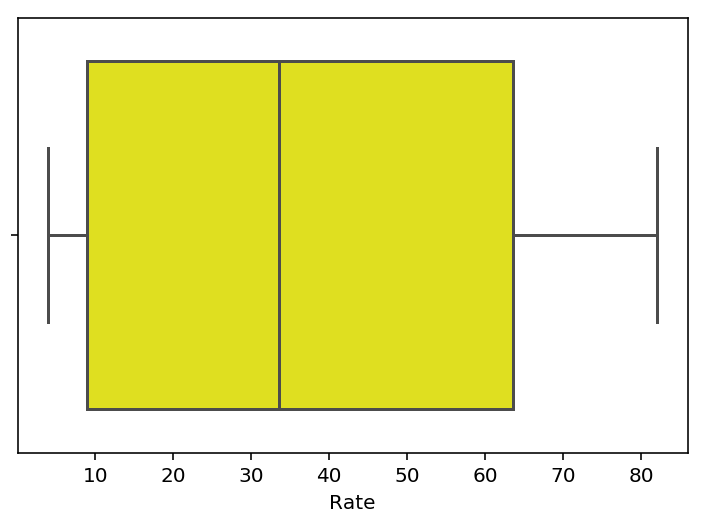

In [60]:
sns.boxplot(sat_df.Rate, color = 'yellow')

In [61]:
sat_df.Rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

One way is to define outlier as a value which is outside this range: [Q1-1.5(Q3-Q1), Q3+1.5(Q3-Q1)] in which Q1 and Q3 are lower and upper quartiles, respectively. Another way to define outlier is to say that any value which is 3 standard deviations away from the mean, is an outlier.

In [62]:
outlier_lower_thresh = 9 - 1.5*(63.5-9)

In [63]:
outlier_upper_thresh = 63.5 + 1.5*(63.5-9)

In [64]:
print("With the first definition of outlier:\n", "lower threshold = ", outlier_lower_thresh, ",\tupper threshold = ", outlier_upper_thresh)

With the first definition of outlier:
 lower threshold =  -72.75 ,	upper threshold =  145.25


In [65]:
print("With the second definition of outlier:\n", "m-3s =", (37.153846-27.301788*3), ",\tm+3s =", (37.153846+27.301788*3))

With the second definition of outlier:
 m-3s = -44.75151799999999 ,	m+3s = 119.05921


The data in Rate falls neither in the first nor the second definition. So there is no outlier in Rate.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


Pearson method measures the linear relationship between two variables wherwhereas Spearman method measures the monotonic relationship and indicates the direction of association between them.
A perfect monotone increasing relationship implies that for any two pairs of data values Xi, Yi and Xj, Yj, Xi − Xj and Yi − Yj always have the same sign. A perfect monotone decreasing relationship implies that these differences always have opposite signs.

The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the rank variables. To calculate correlation between two variables with Spearman method, we should rank the two variables first, and then calculate the correlation for these ranked variables with Pearson method. If ties are present in the dataset, we should put the average of rank for those tie values.

In [66]:
#correlation matrix with Pearson method
sat_df[["Rate", "Verbal", "Math"]].corr(method = 'pearson')

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


In [67]:
#correlation matrix with Spearman method
sat_df[["Rate", "Verbal", "Math"]].corr(method = 'spearman')

,Rate,Verbal,Math
Rate,1.000000,-0.833294,-0.813275
Verbal,-0.833294,1.000000,0.905205
Math,-0.813275,0.905205,1.000000


Now we can test if the result is the same if we calculate it manually. First we rank our data and then use Pearson method. We expect to get the same result as if we use Spearman method on the unranked data.

In [68]:
import scipy.stats as ss

ranked_sat_df = pd.DataFrame([(ss.rankdata(sat_df["Rate"])), (ss.rankdata(sat_df["Verbal"])),
                              (ss.rankdata(sat_df["Math"]))], index = [["Rate","Verbal","Math"]]).T

In [69]:
ranked_sat_df[["Rate", "Verbal", "Math"]].corr(method = 'pearson')

,Rate,Verbal,Math
Rate,1.000000,-0.833294,-0.813275
Verbal,-0.833294,1.000000,0.905205
Math,-0.813275,0.905205,1.000000


It is evident that we get the same result.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [70]:
#the percentile scores for Rate
Rate_percentiles = [ss.percentileofscore(sat_df.Rate, a) for a in sat_df.Rate]

In [71]:
#adding the Rate percentile scores as a column to the sat_df
sat_df["Rate_percentiles"] = Rate_percentiles

In [72]:
#the rank for values of Rate
Rate_ranked = ss.rankdata(sat_df["Rate"])

In [73]:
perc_vs_spearman_coeff = pd.DataFrame([list(sat_df.State), Rate_percentiles, Rate_ranked],
                                index = ["State", "Rate_percentiles", "Rate_ranked"]).T

In [74]:
perc_vs_spearman_coeff.head()

,State,Rate_percentiles,Rate_ranked
0,CT,100,52
1,NJ,98.0769,51
2,MA,96.1538,50
3,NY,94.2308,49
4,NH,92.3077,48


In [75]:
print("Percentile of", perc_vs_spearman_coeff.State[23], "is:", perc_vs_spearman_coeff["Rate_percentiles"][23])

Percentile of CA is: 56.73076923076923


In [76]:
print("The rank of", perc_vs_spearman_coeff.State[23], "is:", perc_vs_spearman_coeff["Rate_ranked"][23],
      "out of", max(perc_vs_spearman_coeff["Rate_ranked"]))

The rank of CA is: 29.5 out of 52.0


Percentile scoring is a way of ranking raw scores. When the percentile score of a state is Si, it means that this state has a raw score which is greater than Si percent of the whole number of states. So the percentile score shows the relative score of each state which is a similar concept to ranking. If we rank the raw scores according to Spearman method, and then calculate the percentile scores of the ranking coefficient, we should get the same result as we just calculate the percentile score of the Rate values.

In [77]:
#calculating the percentile scores for rank coefficients
rank_percentiles = [ss.percentileofscore(perc_vs_spearman_coeff["Rate_ranked"], a)
                    for a in perc_vs_spearman_coeff["Rate_ranked"]]

perc_vs_rank = pd.DataFrame([list(sat_df.State), Rate_percentiles, rank_percentiles],
                                index = ["State", "Rate_percentiles", "Rank_percentiles"]).T

In [78]:
perc_vs_rank.head()

,State,Rate_percentiles,Rank_percentiles
0,CT,100,100
1,NJ,98.0769,98.0769
2,MA,96.1538,96.1538
3,NY,94.2308,94.2308
4,NH,92.3077,92.3077


As it is seen, we get the same result in both ways.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Since percentile scoring is a way of ranking scores, we can easily find the lowest and highest values and check if they are the outliers. For instance, if we have a number which is much greater than the rest data (i.e. is an outlier), its percentile should be 100, because its value is greater than all other values in the dataset.

In [79]:
oxycontin_percentiles = [ss.percentileofscore(drug_use["oxycontin-use"], a) for a in drug_use["oxycontin-use"]]

(array([3., 1., 2., 0., 2., 1., 3., 2., 3.]),
 array([0.        , 0.18888889, 0.37777778, 0.56666667, 0.75555556,
        0.94444444, 1.13333333, 1.32222222, 1.51111111, 1.7       ]),
 <a list of 9 Patch objects>)

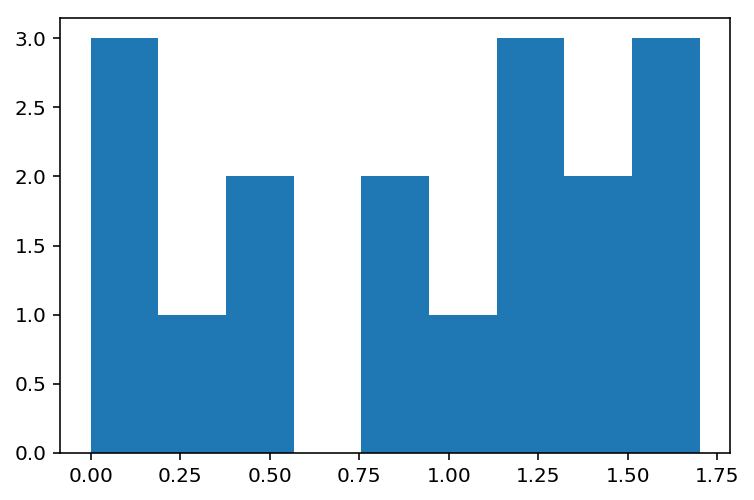

In [80]:
plt.hist(drug_use["oxycontin-use"], bins = 9)

(array([3., 1., 2., 1., 2., 1., 2., 2., 3.]),
 array([ 5.88235294, 15.68627451, 25.49019608, 35.29411765, 45.09803922,
        54.90196078, 64.70588235, 74.50980392, 84.31372549, 94.11764706]),
 <a list of 9 Patch objects>)

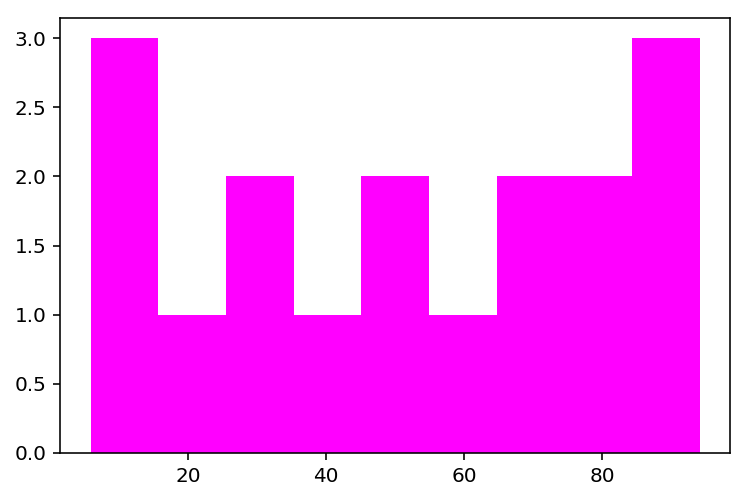

In [81]:
plt.hist(oxycontin_percentiles, bins = 9, color = 'magenta')

To form a histogram of raw scores, we divide the values into bins, put the bins in order and plot the frequency of occurrence for the values of each bin. So in a way, we are ranking different value ranges (by putting the bins in order) and plot the values that fall into those ranges.
As percentile scores are also ordered, we expect a similar histogram for percetiled scores.